### Explorative Analyse der Smartmeter Daten

In [31]:
import sys
import os
sys.path.append(os.path.abspath("../03_src"))

import seaborn as sns
import matplotlib as plt
import polars as pl
import datetime
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


from data_loader import processed_data_load
path_to_file = "../02_data/processed/combined_data_cleaned.parquet"
df_cleaned = processed_data_load(path_to_file)
df_cleaned

✅ Processed Data geladen: 937456 Zeilen, 140 Spalten.


shape: (937_456, 140)
┌───────────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ timestamp ┆ timestamp ┆ date      ┆ year_str ┆ … ┆ heatdistr ┆ visit_dat ┆ year_str_ ┆ swissix_b │
│ ---       ┆ _local    ┆ ---       ┆ ---      ┆   ┆ ibution_r ┆ e_date    ┆ right     ┆ ase       │
│ datetime[ ┆ ---       ┆ date      ┆ str      ┆   ┆ ecommenda ┆ ---       ┆ ---       ┆ ---       │
│ μs, UTC]  ┆ datetime[ ┆           ┆          ┆   ┆ tio…      ┆ date      ┆ str       ┆ f64       │
│           ┆ μs, Europ ┆           ┆          ┆   ┆ ---       ┆           ┆           ┆           │
│           ┆ e/Zurich] ┆           ┆          ┆   ┆ bool      ┆           ┆           ┆           │
╞═══════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2019-03-0 ┆ 2019-03-0 ┆ 2019-03-0 ┆ 2019     ┆ … ┆ false     ┆ null      ┆ null      ┆ 22.79     │
│ 2         ┆ 3         ┆ 3         ┆          ┆   ┆           ┆           ┆           ┆           │
│ 23:59:59  ┆ 00:59:59  ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ UTC       ┆ CET       ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 2019-03-0 ┆ 2019-03-0 ┆ 2019-03-0 ┆ 2019     ┆ … ┆ false     ┆ null      ┆ null      ┆ 37.938333 │
│ 3         ┆ 4         ┆ 4         ┆          ┆   ┆           ┆           ┆           ┆           │
│ 23:59:59  ┆ 00:59:59  ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ UTC       ┆ CET       ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 2019-03-0 ┆ 2019-03-0 ┆ 2019-03-0 ┆ 2019     ┆ … ┆ false     ┆ null      ┆ null      ┆ 37.9225   │
│ 4         ┆ 5         ┆ 5         ┆          ┆   ┆           ┆           ┆           ┆           │
│ 23:59:59  ┆ 00:59:59  ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ UTC       ┆ CET       ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 2019-03-0 ┆ 2019-03-0 ┆ 2019-03-0 ┆ 2019     ┆ … ┆ false     ┆ null      ┆ null      ┆ 40.97875  │
│ 5         ┆ 6         ┆ 6         ┆          ┆   ┆           ┆           ┆           ┆           │
│ 23:59:59  ┆ 00:59:59  ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ UTC       ┆ CET       ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 2019-03-0 ┆ 2019-03-0 ┆ 2019-03-0 ┆ 2019     ┆ … ┆ false     ┆ null      ┆ null      ┆ 34.819167 │
│ 6         ┆ 7         ┆ 7         ┆          ┆   ┆           ┆           ┆           ┆           │
│ 23:59:59  ┆ 00:59:59  ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ UTC       ┆ CET       ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ …         ┆ …         ┆ …         ┆ …        ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 2024-03-1 ┆ 2024-03-1 ┆ 2024-03-1 ┆ 2024     ┆ … ┆ false     ┆ null      ┆ null      ┆ 60.337917 │
│ 6         ┆ 7         ┆ 7         ┆          ┆   ┆           ┆           ┆           ┆           │
│ 23:59:59  ┆ 00:59:59  ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ UTC       ┆ CET       ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 2024-03-1 ┆ 2024-03-1 ┆ 2024-03-1 ┆ 2024     ┆ … ┆ false     ┆ null      ┆ null      ┆ 81.739583 │
│ 7         ┆ 8         ┆ 8         ┆          ┆   ┆           ┆           ┆           ┆           │
│ 23:59:59  ┆ 00:59:59  ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ UTC       ┆ CET       ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 2024-03-1 ┆ 2024-03-1 ┆ 2024-03-1 ┆ 2024     ┆ … ┆ false     ┆ null      ┆ null      ┆ 84.41875  │
│ 8         ┆ 9         ┆ 9         ┆          ┆   ┆           ┆           ┆           ┆           │
│ 23:59:59  ┆ 00:59:59  ┆           ┆  

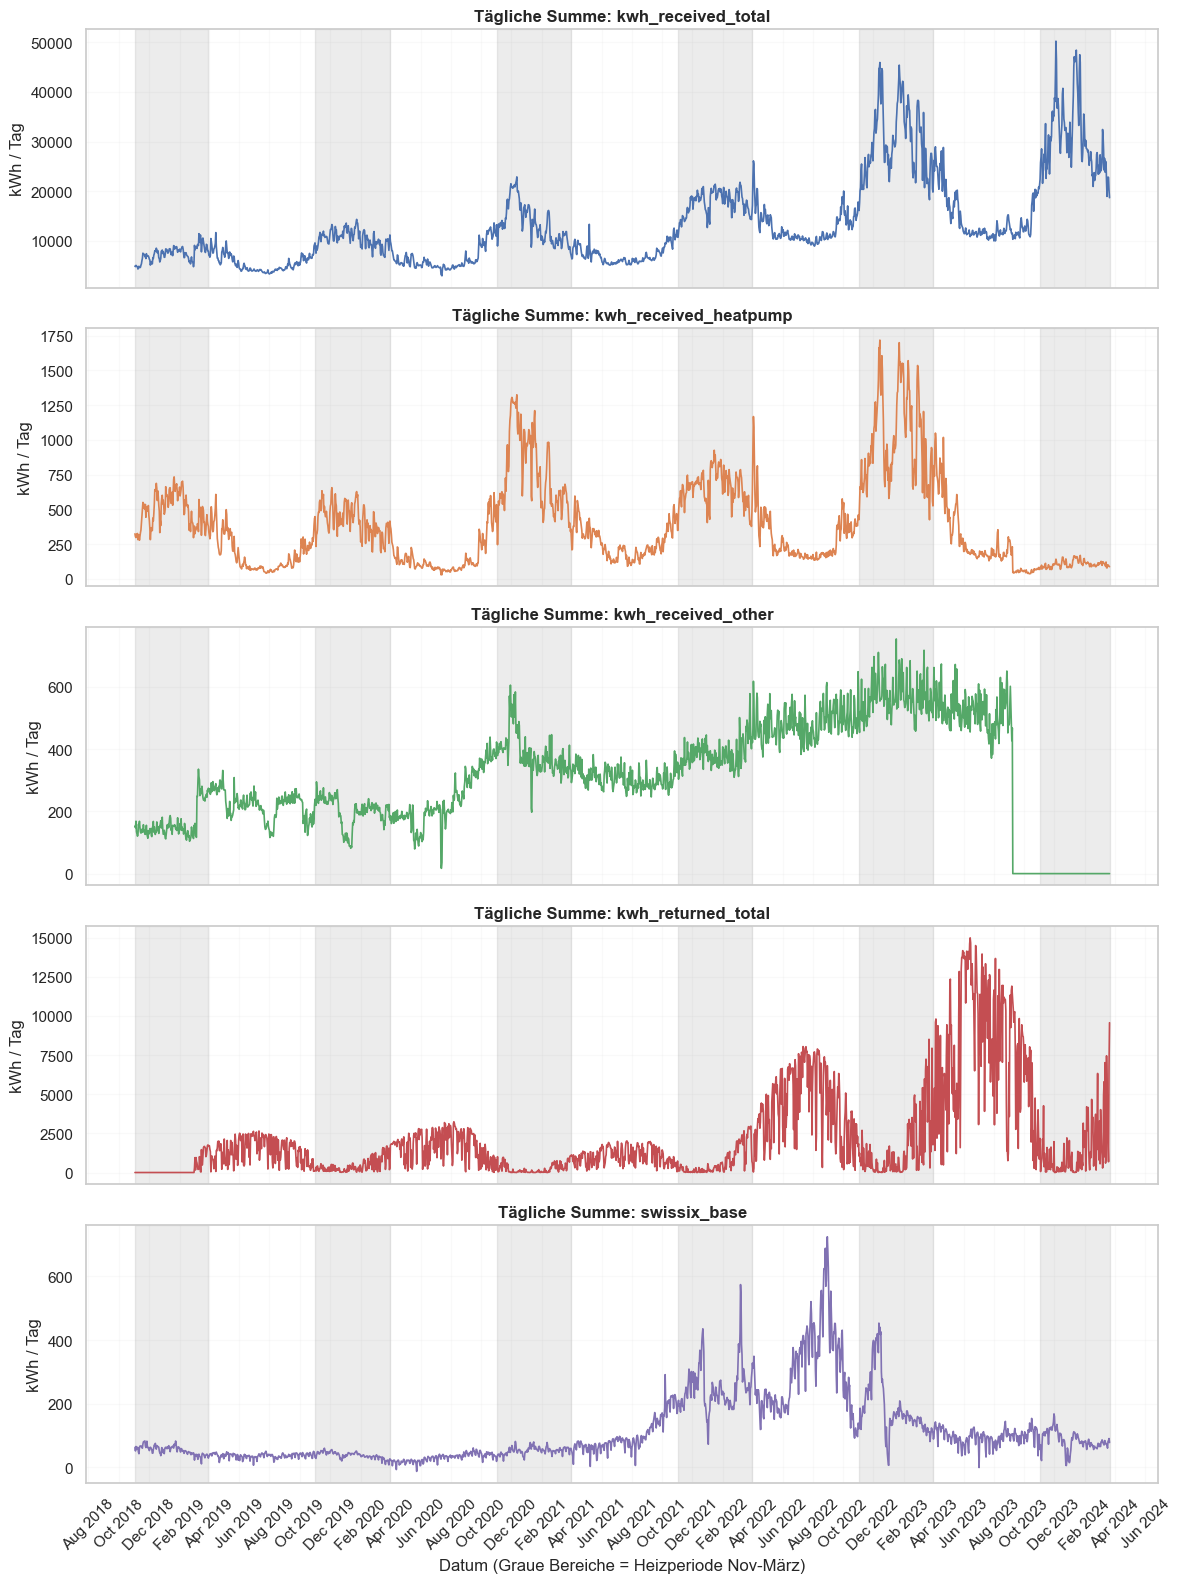

In [32]:
#Die Verbrauchsvariablen einmal auf die Zeitachse plotten

smart_meter_sum = (df_cleaned.group_by('date').agg([
                                                        pl.col("kwh_received_total").sum(),
                                                        pl.col("kwh_received_heatpump").sum(),
                                                        pl.col("kwh_received_other").sum(),
                                                        pl.col("kwh_returned_total").sum(),
                                                        pl.col("swissix_base").first()
                                                        ]).sort("date"))


metrics = ["kwh_received_total", "kwh_received_heatpump", "kwh_received_other", "kwh_returned_total","swissix_base"]
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 16), sharex=True)

# Datumsbereich des Datensatzes ermitteln für axvspan Begrenzung
min_date = smart_meter_sum["date"].min()
max_date = smart_meter_sum["date"].max()

for i, col in enumerate(metrics):
    axes[i].plot(
        smart_meter_sum["date"], 
        smart_meter_sum[col], 
        color=f"C{i}",
        linewidth=1.2,
        label=col
    )
    
    # --- WINTERMARKIERUNG (Heizperiode) ---
    years = smart_meter_sum["date"].dt.year().unique().to_list()
    # Wir decken auch das Vorjahr ab, falls der Datensatz im Jan/Feb startet
    for year in [years[0]-1] + years:
        start_winter = datetime(year, 11, 1).date()
        end_winter = datetime(year + 1, 3, 31).date()
        
        # Nur zeichnen, wenn der Zeitraum im Datensatz liegt
        if end_winter >= min_date and start_winter <= max_date:
            axes[i].axvspan(
                max(start_winter, min_date), 
                min(end_winter, max_date), 
                color='gray', 
                alpha=0.15, 
                label='Heizperiode' if i==0 and year==years[0] else ""
            )

    # Zeitachsen-Formatierung
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    axes[i].set_title(f"Tägliche Summe: {col}", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("kWh / Tag")
    axes[i].grid(True, which='both', alpha=0.1)

plt.xticks(rotation=45)
plt.xlabel("Datum (Graue Bereiche = Heizperiode Nov-März)")
plt.tight_layout()
plt.show()

# Anmerkungen
                           
- Man sieht sehr deutlich die Sasionallen Trends:
- In den Wintermonaten stetgt der verbrauch der Wärmepumpe deutlich. Aber auch der GEsamtverbrauch
- Gleichzeitig sieht man aber auch, dass die Werte für die Wärmepumpe zm Ende der Beobachtungsperiode deutlich abfallen
- Auch bei other sieht man deutlich, dass es abfällt - Diese Missings konnten auch wie bereits angemerkt nicht bereinigt werden
- Wie bereits bei der Analyse der fehlenden Werte angemerkt können die fehlenden Werte nicht befüllt werden
- Der Entwicklung des Spotpreises zeigt deutlich, dass hier die Preisanstiege nicht nur während dr Heizperiode zunehmen.

## Explorative Analyse der Wetterdaten

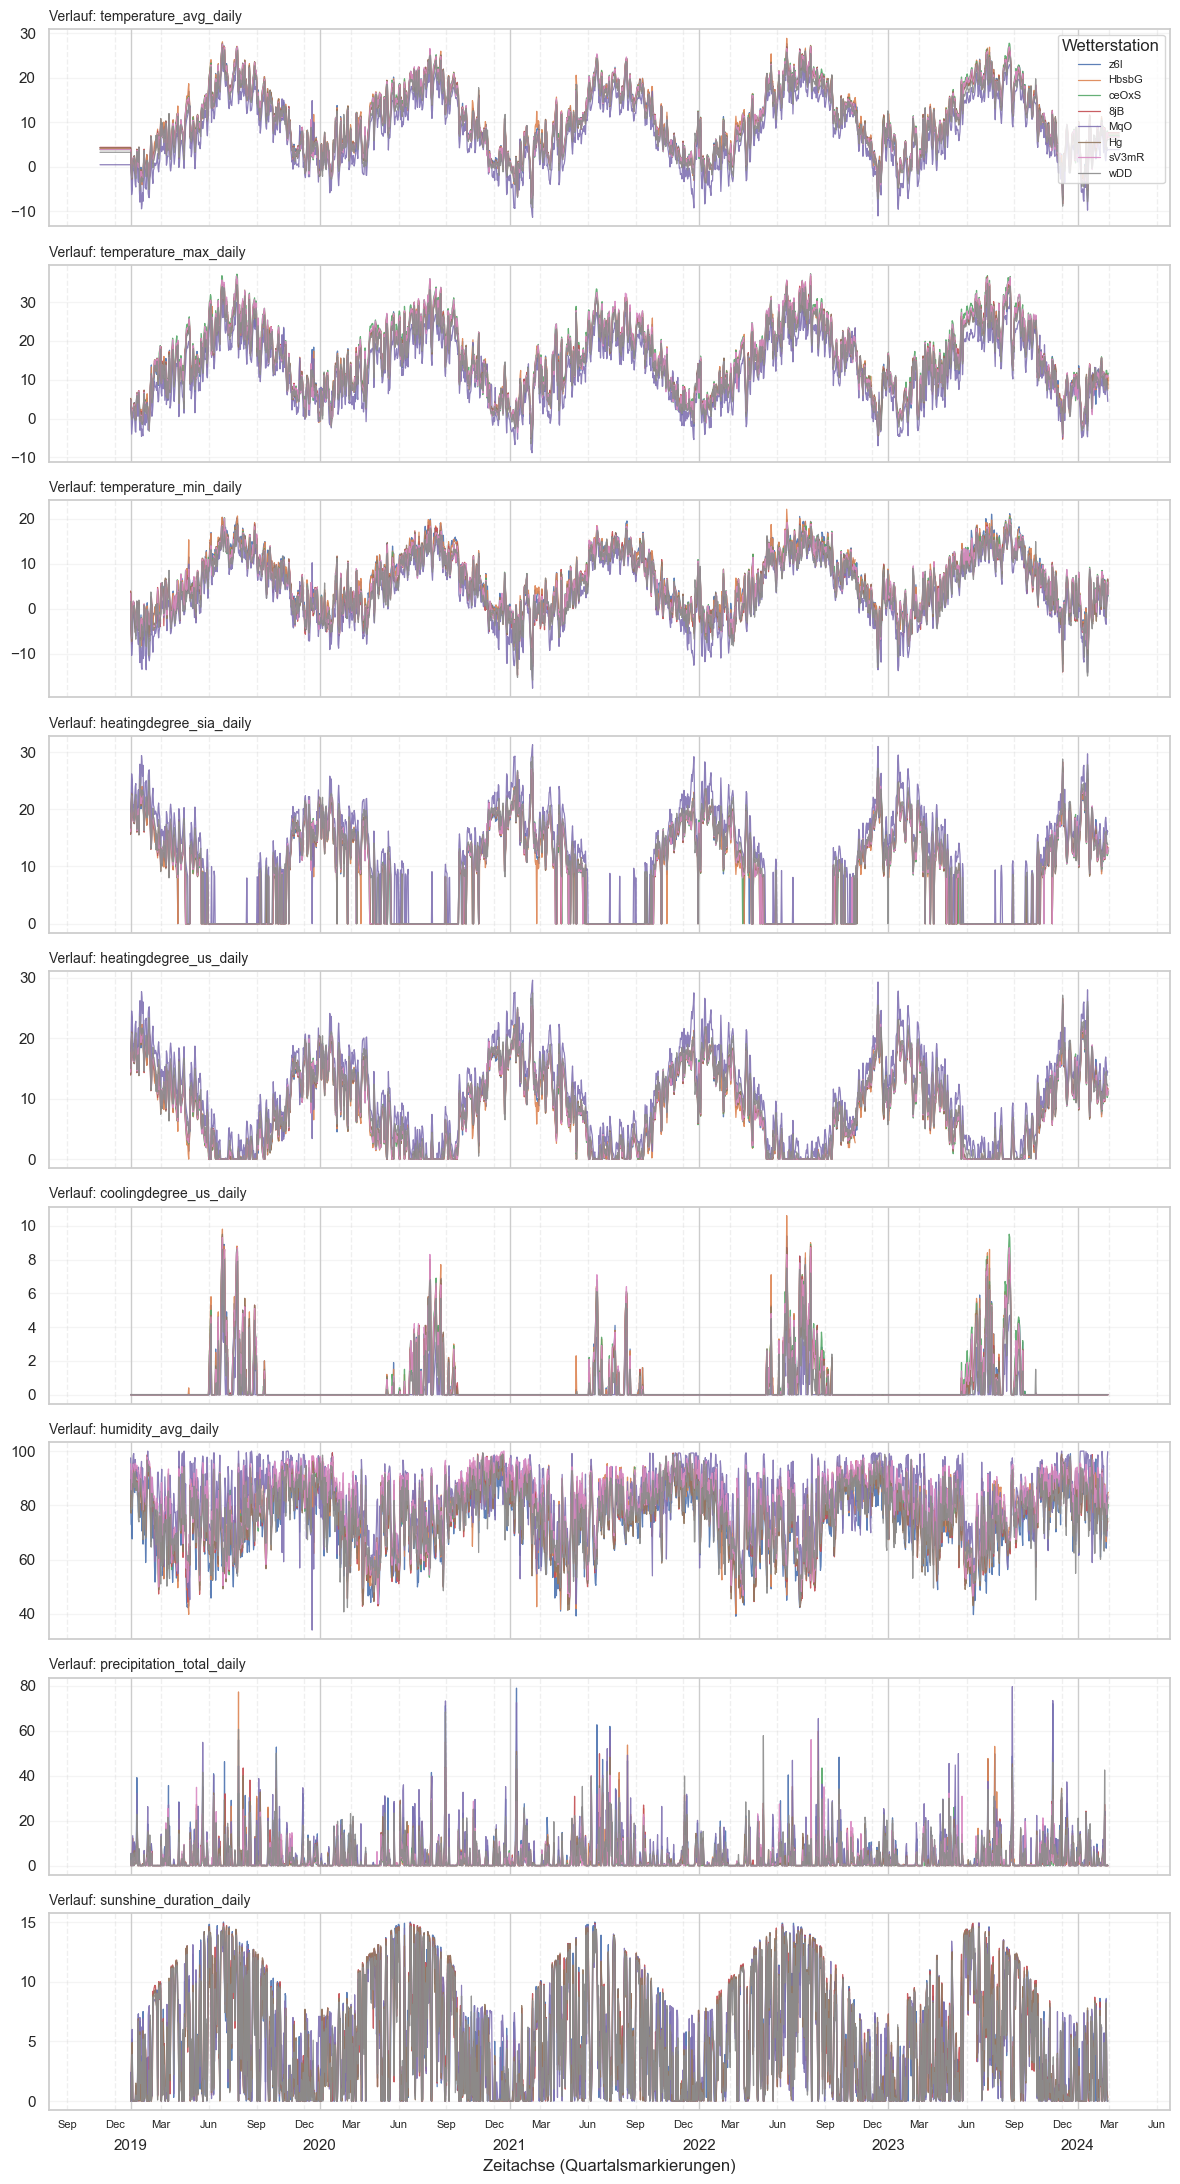

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import polars as pl

# --- WICHTIG: Daten vorbereiten ---
# 1. Sicherstellen, dass 'date' ein Date-Typ ist (falls nicht schon in der Pipeline geschehen)
# 2. UNBEDINGT sortieren, damit die Linien keine Zick-Zack-Muster bilden


weather_data =(
    df_cleaned
    .group_by(["weather_id", "date"])
    .agg([
        pl.col("temperature_avg_daily").first(),
        pl.col("temperature_max_daily").first(),
        pl.col("temperature_min_daily").first(),
        pl.col("heatingdegree_sia_daily").first(),
        pl.col("heatingdegree_us_daily").first(),
        pl.col("coolingdegree_us_daily").first(),
        pl.col("humidity_avg_daily").first(),
        pl.col("precipitation_total_daily").first(),
        pl.col("sunshine_duration_daily").first(),
    ])
    .sort(["weather_id", "date"])
)

metrics = [
    "temperature_avg_daily",
    "temperature_max_daily",
    "temperature_min_daily",
    "heatingdegree_sia_daily",
    "heatingdegree_us_daily",
    "coolingdegree_us_daily",
    "humidity_avg_daily",
    "precipitation_total_daily",
    "sunshine_duration_daily",
]

stations = weather_data["weather_id"].unique().to_list()

fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 22), sharex=True)

if len(metrics) == 1:
    axes = [axes]

for i, col in enumerate(metrics):

    for j, station in enumerate(stations):

        df_station = weather_data.filter(
            pl.col("weather_id") == station
        )

        axes[i].plot(
            df_station["date"],
            df_station[col],
            linewidth=0.9,
            label=f"{station}",
            alpha=0.9
        )

    axes[i].xaxis.set_major_locator(mdates.YearLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('\n%Y'))

    axes[i].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[3, 6, 9, 12]))
    axes[i].xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

    axes[i].grid(True, which='minor', axis='x', linestyle='--', alpha=0.3)
    axes[i].grid(True, which='major', axis='y', alpha=0.2)

    axes[i].set_title(f"Verlauf: {col}", fontsize=10, loc='left')
    axes[i].tick_params(axis='x', which='minor', labelsize=8)

    if i == 0:
        axes[i].legend(title="Wetterstation", fontsize=8)

plt.xlabel("Zeitachse (Quartalsmarkierungen)")
plt.tight_layout()
plt.show()

# Anmerkungen
                           
- Man sieht sehr deutlich die Sasionallen Trends:
- Die Durchschnittswerte bieten sich natürlich an für eine Vorhersage auf täglicher Basis
- Durch die fabrliche Unterscheidung zwischen den Wetter Stationen sieht man auch ganz gut, dass alle den selben Trend aufweisen. 
- Dies macht insofern Sinn, da sich die Stationen im Züricher Stadtgebiet befinden

# Explorative Analyse der Technischen Haushaltsdaten

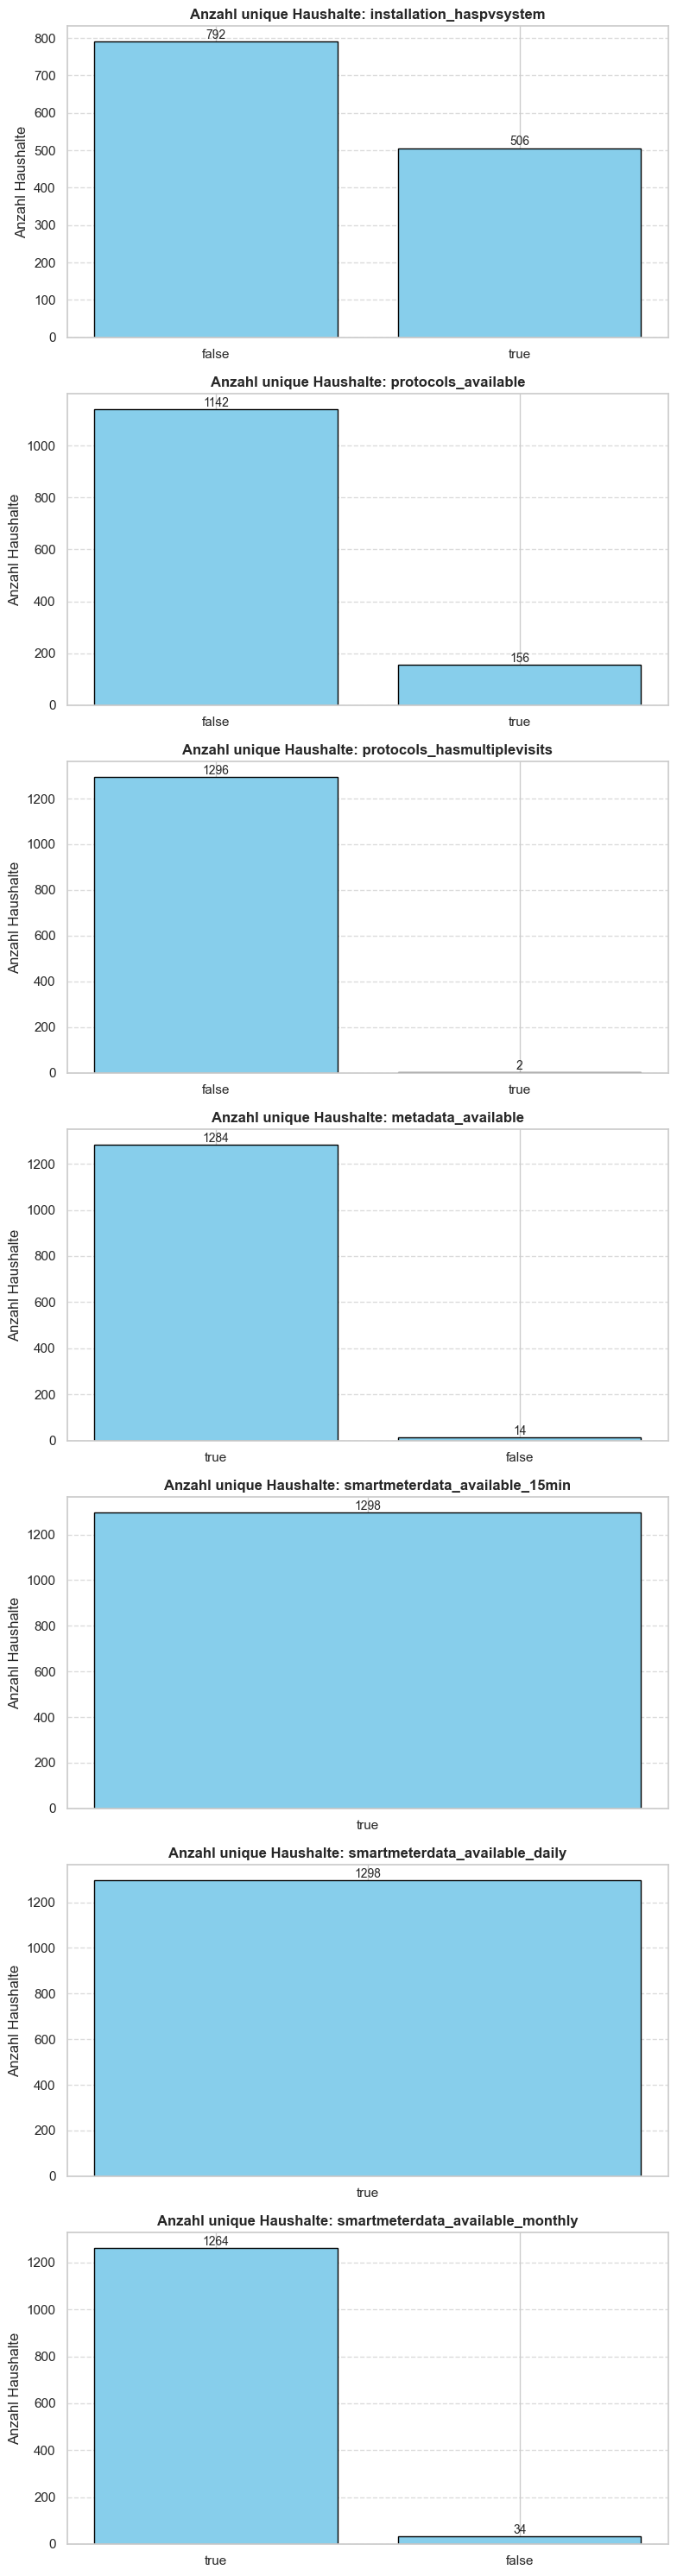

In [34]:
import polars as pl
import matplotlib.pyplot as plt

# Liste der Metriken (Metadaten-Spalten)
metrics = [
    "installation_haspvsystem", "protocols_available", "protocols_hasmultiplevisits", 
    "metadata_available", "smartmeterdata_available_15min", 
    "smartmeterdata_available_daily", "smartmeterdata_available_monthly"
]


fig, axes = plt.subplots(len(metrics), 1, figsize=(8, 30))

for i, col in enumerate(metrics):
    # Aggregation: Zähle wie viele EINDEUTIGE Haushalte pro Ausprägung existieren
    counts = (
        df_cleaned
        .group_by(col)
        .agg(pl.col("household_id").n_unique().alias("nunique_households"))
        .sort(by="nunique_households", descending=True)
    )
    
    # Konvertiere Labels zu String (wichtig für Booleans/Nulls beim Plotten)
    # Wir füllen eventuelle Nulls mit "Unbekannt"
    x_labels = counts[col].cast(pl.String).fill_null("Unbekannt").to_list()
    y_values = counts["nunique_households"].to_list()
    
    # Balkendiagramm erstellen
    axes[i].bar(x_labels, y_values, color="skyblue", edgecolor="black")
    
    # Styling
    axes[i].set_title(f"Anzahl unique Haushalte: {col}", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Anzahl Haushalte")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Text-Labels über die Balken schreiben (für bessere Lesbarkeit)
    for j, val in enumerate(y_values):
        axes[i].text(j, val + 0.1, str(val), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Anmerkungen
                           
- 506 haushalte haben einen PV - Wobei noch zu klären ist ob diese erst ab einem gewissen Zeitpunkt isntalliert wurde
- Es liegen für alle Haaushalte 15 min und Tägliche Smartmeter Daten vor. Was für die Vorhersage von Vorteil ist. Die Gesamtverbrauchsdaten weisen dabei keine fehlenden Werte auf 

# Explorative Analyse der Meta Informationen zum Haushalt

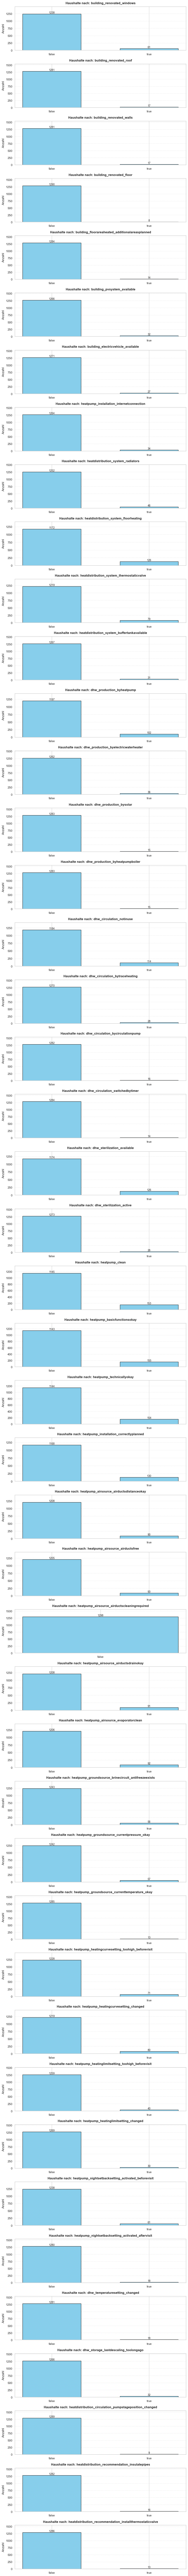

In [35]:
import polars as pl
import matplotlib.pyplot as plt


metrics = [
     'building_renovated_windows', 'building_renovated_roof', 'building_renovated_walls', 
    'building_renovated_floor', 'building_floorareaheated_additionalareasplanned', 
    'building_pvsystem_available', 'building_electricvehicle_available', 
    'heatpump_installation_internetconnection', 'heatdistribution_system_radiators', 
    'heatdistribution_system_floorheating', 'heatdistribution_system_thermostaticvalve', 
    'heatdistribution_system_buffertankavailable', 'dhw_production_byheatpump', 
    'dhw_production_byelectricwaterheater', 'dhw_production_bysolar', 
    'dhw_production_byheatpumpboiler', 'dhw_circulation_notinuse', 
    'dhw_circulation_bytraceheating', 'dhw_circulation_bycirculationpump', 
    'dhw_circulation_switchedbytimer', 'dhw_sterilization_available', 
    'dhw_sterilization_active', 'heatpump_clean', 'heatpump_basicfunctionsokay', 
    'heatpump_technicallyokay', 'heatpump_installation_correctlyplanned', 
    'heatpump_airsource_airductsdistanceokay', 'heatpump_airsource_airductsfree', 
    'heatpump_airsource_airductscleaningrequired', 'heatpump_airsource_airductsdrainokay', 
    'heatpump_airsource_evaporatorclean', 'heatpump_groundsource_brinecircuit_antifreezeexists', 
    'heatpump_groundsource_currentpressure_okay', 'heatpump_groundsource_currenttemperature_okay', 
    'heatpump_heatingcurvesetting_toohigh_beforevisit', 'heatpump_heatingcurvesetting_changed', 
    'heatpump_heatinglimitsetting_toohigh_beforevisit', 'heatpump_heatinglimitsetting_changed', 
    'heatpump_nightsetbacksetting_activated_beforevisit', 'heatpump_nightsetbacksetting_activated_aftervisit', 
    'dhw_temperaturesetting_changed', 'dhw_storage_lastdescaling_toolongago', 
    'heatdistribution_circulation_pumpstageposition_changed', 'heatdistribution_recommendation_insulatepipes', 
    'heatdistribution_recommendation_installthermostaticvalve',
]
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, len(metrics) * 3))

for i, col in enumerate(metrics):
    # Aggregation mit expliziter Behandlung von Null-Werten
    counts = (
        df_cleaned
        .select([col, "household_id"])
        .group_by(col)
        .agg(pl.col("household_id").n_unique().alias("nunique_households"))
        .sort(by="nunique_households", descending=True)
    )
    
    # Labels vorbereiten und sicherstellen, dass Nulls als "Missing" erscheinen
    x_labels = counts[col].cast(pl.String).fill_null("Missing").to_list()
    y_values = counts["nunique_households"].to_list()
    
    # Plotten
    bars = axes[i].bar(x_labels, y_values, color="skyblue", edgecolor="black", width=0.6)
    
    # Titel & Achsen
    axes[i].set_title(f"Haushalte nach: {col}", fontsize=12, fontweight='bold', pad=10)
    axes[i].set_ylabel("Anzahl")
    axes[i].set_ylim(0, max(y_values) * 1.2) # Etwas Platz oben für die Labels
    axes[i].grid(axis='y', linestyle='--', alpha=0.4)

    # Wert-Labels oben auf die Balken setzen
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
# Speichere das Bild ggf. ab, falls es im Notebook zu groß zum Anzeigen ist
# plt.savefig("verteilung_metriken.png", dpi=100)
plt.show()

## building_renovated_windows

- Mehrheit der Haushalte hat keine Fensterrenovierung durchgeführt (≈ 1.238).
- Fast alle Haushalte haben kein renoviertes Dach (≈ 1.281).
- building_renovated_walls: Klare Dominanz von „false“ (≈ 1.281).
- building_renovated_floor: Nahezu alle Haushalte ohne Bodensanierung (≈ 1.290).
- building_floorareaheated_additionalareasplanned: Sehr wenige Haushalte planen zusätzliche beheizte Flächen (≈ 16).
- building_pvsystem_available: Mehrheit verfügt über kein PV-System (≈ 1.286).
- building_electricvehicle_available: Fast alle Haushalte besitzen kein Elektrofahrzeug (≈ 1.271).
- heatpump_installation_internetconnection: Überwältigende Mehrheit ohne Internetverbindung an der Wärmepumpe (≈ 1.264).
- heatdistribution_system_radiators: Fast alle Haushalte nutzen keine Radiatoren als primäres System (≈ 1.252).
- heatdistribution_system_floorheating: Klare Dominanz von „false“ bei Fußbodenheizungen (≈ 1.172).
- heatdistribution_system_thermostaticvalve: Nahezu alle Haushalte ohne installierte Thermostatventile (≈ 1.219).
- heatdistribution_system_buffertankavailable: Fast kein Haushalt verfügt über einen Pufferspeicher (≈ 1.267).
- dhw_production_byheatpump: Mehrheit der Haushalte erzeugt Warmwasser nicht über die Wärmepumpe (≈ 1.197).
- dhw_production_byelectricwaterheater: Fast alle Haushalte ohne elektrischen Warmwasserbereiter (≈ 1.262).
- dhw_production_bysolar: Nahezu kein Haushalt nutzt Solarthermie (≈ 1.283).
- dhw_production_byheatpumpboiler: Klare Dominanz von „false“ bei dedizierten Warmwasser-Wärmepumpen (≈ 1.283).
- dhw_circulation_notinuse: Die Zirkulation ist bei fast allen Haushalten offiziell in Gebrauch (≈ 1.184 „false“ für „nicht in Gebrauch“).
- dhw_circulation_bytraceheating: Fast kein Haushalt nutzt eine Begleitheizung (≈ 1.270).
- dhw_circulation_bycirculationpump: Nahezu alle Haushalte ohne aktive Zirkulationspumpe (≈ 1.282).
- dhw_circulation_switchedbytimer: Fast keine Zirkulationssteuerung per Zeitschaltuhr vorhanden (≈ 1.284).-
- dhw_sterilization_available: Mehrheit hat keine Funktion zur thermischen Desinfektion (≈ 1.174).
- dhw_sterilization_active: Fast kein Haushalt hat die Sterilisation aktiv geschaltet (≈ 1.273).
- dhw_storage_lastdescaling_toolongago: Bei fast allen Haushalten liegt die Entkalkung nicht zu lange zurück (≈ 1.266).
- heatpump_clean: Die meisten Wärmepumpen wurden als nicht sauber eingestuft (≈ 1.145).
- heatpump_basicfunctionsokay: Bei der Mehrheit wurden Mängel an den Grundfunktionen festgestellt (≈ 1.143 „false“).
- heatpump_technicallyokay: Klare Dominanz von technisch nicht einwandfreien Anlagen (≈ 1.144).
- heatpump_installation_correctlyplanned: Fast alle Installationen wurden als nicht korrekt geplant bewertet (≈ 1.168).
- heatpump_airsource_airductsdistanceokay: Mehrheit der Luftkanäle weist keine korrekten Abstände auf (≈ 1.208).
- heatpump_airsource_airductsfree: Fast alle Luftkanäle sind nicht vollständig frei (≈ 1.205).
- heatpump_airsource_airductscleaningrequired: Nahezu alle Haushalte benötigen laut Grafik keine Reinigung (≈ 1.298 „false“).
- heatpump_airsource_airductsdrainokay: Bei fast allen Geräten ist der Kondensatablauf nicht ideal (≈ 1.208).
- heatpump_airsource_evaporatorclean: Klare Dominanz von unsauberen Verdampfern (≈ 1.206).
- heatpump_groundsource_brinecircuit_antifreezexists: Fast alle Sole-Anlagen ohne nachgewiesenen Frostschutz (≈ 1.243).
- heatpump_groundsource_currentpressure_okay: Nahezu alle Haushalte mit suboptimalem Soledruck (≈ 1.242).
- heatpump_groundsource_currenttemperature_okay: Fast keine Sole-Anlage weist eine korrekte Temperatur auf (≈ 1.285).
- heatpump_heatingcurvesetting_toohigh_beforevisit: Bei der Mehrheit war die Heizkurve vorab nicht zu hoch (≈ 1.228).
- heatpump_heatingcurvesetting_changed: Bei fast allen Haushalten wurde die Heizkurve nicht verändert (≈ 1.219).
- heatpump_heatinglimitsetting_toohigh_beforevisit: Fast kein Haushalt hatte ein zu hohes Heizlimit (≈ 1.259).
- heatpump_heatinglimitsetting_changed: Klare Dominanz von unveränderten Heizlimits (≈ 1.269).
- heatpump_nightsetbacksetting_activated_beforevisit: Mehrheit der Haushalte ohne aktive Nachtabsenkung vor dem Besuch (≈ 1.238).
- heatpump_nightsetbacksetting_activated_aftervisit: Fast alle Haushalte ohne aktive Nachtabsenkung nach dem Besuch (≈ 1.280).
- dhw_temperaturesetting_changed: Nahezu kein Haushalt mit geänderter Warmwassertemperatur (≈ 1.281).
- heatdistribution_circulation_pumpstageposition_changed: Fast keine Änderung der Pumpenstufe durchgeführt (≈ 1.289).
- heatdistribution_recommendation_insulatepipes: Nahezu keine Empfehlung zur Rohrdämmung ausgesprochen (≈ 1.282 „false“).
- heatdistribution_recommendation_installthermostaticvalve: Fast keine Empfehlung für neue Thermostatventile (≈ 1.286 „false“).

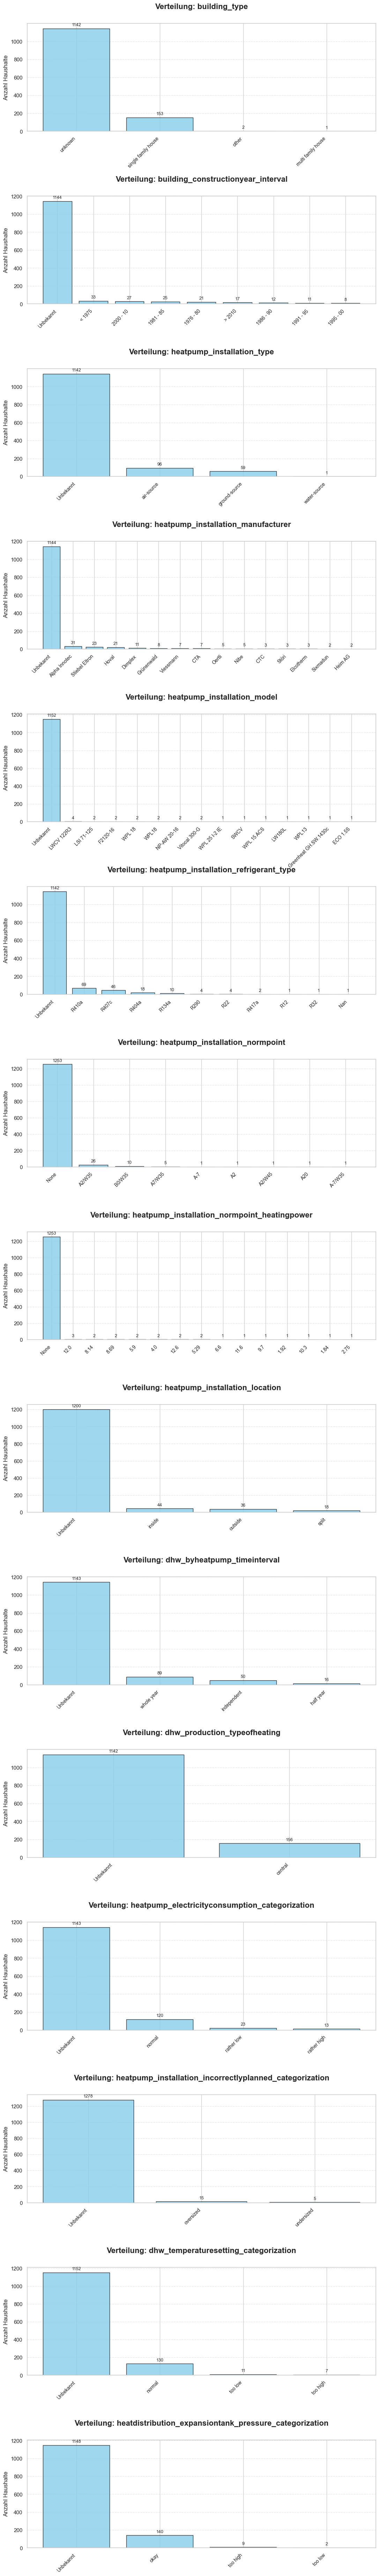

In [36]:
import polars as pl
import matplotlib.pyplot as plt

# Sicherstellen, dass das Schema stimmt (siehe dein pl.Boolean/pl.String Schema)
metrics = [ 
    'building_type', 'building_constructionyear_interval', 'heatpump_installation_type', 
    'heatpump_installation_manufacturer', 'heatpump_installation_model', 
    'heatpump_installation_refrigerant_type', 'heatpump_installation_normpoint', 
    'heatpump_installation_normpoint_heatingpower', 'heatpump_installation_location', 
    'dhw_byheatpump_timeinterval', 'dhw_production_typeofheating', 
    'heatpump_electricityconsumption_categorization', 'heatpump_installation_incorrectlyplanned_categorization', 
    'dhw_temperaturesetting_categorization', 'heatdistribution_expansiontank_pressure_categorization'
]

# Erhöhte Figure-Größe für die Menge an Plots
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, len(metrics) * 5))

for i, col in enumerate(metrics):
    # Aggregation mit Handling von Null-Werten
    counts = (
        df_cleaned
        .select([col, "household_id"])
        .group_by(col)
        .agg(pl.col("household_id").n_unique().alias("nunique_households"))
        .sort(by="nunique_households", descending=True)
        .head(15)  # Begrenzung auf Top 15, sonst stürzt Matplotlib bei 'model' ab
    )

    # Daten für Plot vorbereiten
    x_labels = [str(x) for x in counts[col].to_list()]
    y_values = counts["nunique_households"].to_list()
    
    bars = axes[i].bar(x_labels, y_values, color="skyblue", edgecolor="black", alpha=0.8)
    
    # Titel und Beschriftung (Variablenbeschreibung steht im Plot-Titel)
    axes[i].set_title(f"Verteilung: {col}", fontsize=16, fontweight='bold', pad=30)
    axes[i].set_ylabel("Anzahl Haushalte", fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    
    # X-Achsen Optimierung
    axes[i].set_xticks(range(len(x_labels)))
    axes[i].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=10)
    
    # Werte über den Balken (bar_label nutzt die y-Werte direkt)
    axes[i].bar_label(bars, padding=3, fontsize=9)

# Erst tight_layout, dann manuelles hspace für die Titel-Lücken
plt.tight_layout(pad=4.0)
plt.subplots_adjust(hspace=0.6) 

plt.show()

- building_type: Die überwältigende Mehrheit der Gebäude ist als „unknown“ eingestuft (≈ 1.142), während bei den bekannten Typen das Einfamilienhaus dominiert (≈ 153).
- building_constructionyear_interval: Für fast alle Datensätze fehlt die Angabe zum Baujahresintervall (≈ 1.144); die größte bekannte Gruppe stammt aus der Zeit vor 1975 (≈ 33)
- heatpump_installation_type: Klare Dominanz von unbekannten Installationstypen (≈ 1.142); bei den identifizierten Systemen ist die Luft-Wärmepumpe (air-source) am häufigsten (≈ 96)
- heatpump_installation_manufacturer: Der Hersteller ist fast immer als „Unbekannt“ hinterlegt (≈ 1.144); unter den bekannten Marken führen Alpha Innotec (≈ 31) und Stiebel Eltron (≈ 23)
- heatpump_installation_model: Nahezu alle Modellbezeichnungen sind unbekannt (≈ 1.152).
- heatpump_installation_refrigerant_type: Bei der Mehrheit ist der Kältemitteltyp nicht dokumentiert (≈ 1.142); R410A (≈ 69) und R407C (≈ 46) sind die am häufigsten genannten bekannten Typen.
- heatpump_installation_normpoint: Fast alle Normpunkte sind nicht erfasst (≈ 1.253); der häufigste bekannte Wert ist A2/W35 (≈ 26).
- heatpump_installation_normpoint_heatingpower: Bei fast allen Geräten fehlt die Angabe zur Heizleistung am Normpunkt (≈ 1.253).
- heatpump_installation_location: Der Aufstellungsort ist meist unbekannt (≈ 1.200); bei bekannter Lage wird die Innenaufstellung („inside“) am häufigsten genannt (≈ 44).
- dhw_byheatpump_timeinterval: Die Zeitintervalle für die Warmwasserbereitung sind meist unbekannt (≈ 1.143); ganzjähriger Betrieb („whole year“) ist die häufigste bekannte Einstellung (≈ 89).
- dhw_production_typeofheating: Fast alle Haushalte haben keine Angabe zur Heizungsart des Warmwassers (≈ 1.142); „central“ wird in 156 Fällen explizit genannt
- heatpump_electricityconsumption_categorization: Der Stromverbrauch ist für die Mehrheit unbekannt (≈ 1.143); im bekannten Bereich wird er meist als „normal“ eingestuft (≈ 120).
- heatpump_installation_incorrectlyplanned_categorization: Fast alle Planungsdetails fehlen (≈ 1.278); falls Fehler benannt wurden, wird „oversized“ (≈ 15) öfter genannt als „undersized“ (≈ 5).

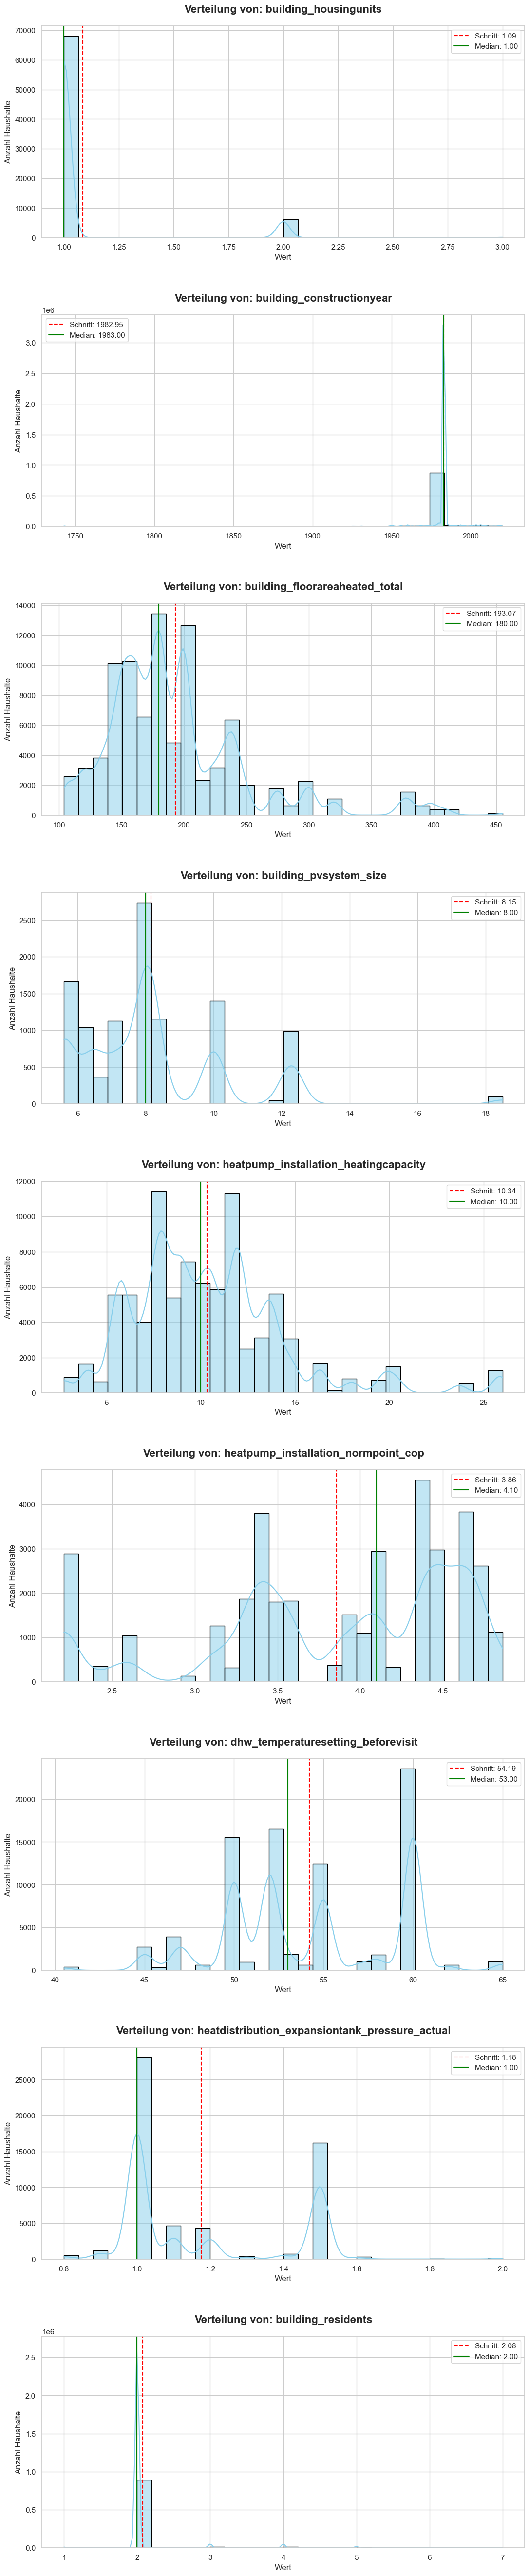

In [37]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Deine Liste (ich habe die unnötige Verschachtelung der Liste korrigiert)
metrics = [
    'building_housingunits', 'building_constructionyear', 'building_floorareaheated_total', 
    'building_pvsystem_size', 'heatpump_installation_heatingcapacity', 
    'heatpump_installation_normpoint_cop', 'dhw_temperaturesetting_beforevisit',
    'heatdistribution_expansiontank_pressure_actual',
    'building_residents'
] 
# Tipp: Ich habe hier nur eine Auswahl genommen, du kannst deine ganze Liste oben einfügen.

# Wir nutzen Seaborn für schönere statistische Plots
sns.set_theme(style="whitegrid")

# Dynamische Erstellung der Subplots
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, len(metrics) * 6))

# Falls nur eine Metrik vorhanden ist, muss axes in eine Liste umgewandelt werden
if len(metrics) == 1:
    axes = [axes]

for i, col in enumerate(metrics):
    # Daten vorbereiten: Null-Werte entfernen, da Histogramme sonst Fehler werfen können
    data = df_cleaned.select(col).drop_nulls().to_series()
    
    if data.len() == 0:
        axes[i].text(0.5, 0.5, f"Keine Daten für {col}", ha='center')
        continue

    # Histogramm mit Kerndichteschätzung (KDE) für die Verteilungskurve
    sns.histplot(data, bins=30, kde=True, ax=axes[i], color="skyblue", edgecolor="black")
    
    # --- TITEL & LABELS ---
    axes[i].set_title(f"Verteilung von: {col}", fontsize=16, fontweight='bold', pad=20)
    axes[i].set_xlabel("Wert", fontsize=12)
    axes[i].set_ylabel("Anzahl Haushalte", fontsize=12)
    
    # Statistische Kennzahlen als Linien einzeichnen (Mittelwert & Median)
    mean_val = data.mean()
    median_val = data.median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Schnitt: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    axes[i].legend()

# Layout optimieren
plt.tight_layout(pad=4.0)
plt.show()

- building_housingunits:
Stark rechtsschiefe Verteilung, fast alle Gebäude mit 1 Wohneinheit.
Mittelwert leicht über 1, Median bei 1.
- building_constructionyear:
Hauptmasse der Gebäude zwischen ca. 1950 und 2000, Peak um 1960er/1970er.
Mittelwert und Median liegen nahe beieinander im Bereich frühe 1960er.
-building_floorareaheated_total:
Breite Verteilung mit Schwerpunkt etwa zwischen 130 und 220 m².
Leichter Rechtsschwanz mit einigen großen Gebäuden >300 m², Mittelwert etwas über dem Median.
building_pvsystem_size:
- Viele Gebäude ohne PV (0) und ein Cluster kleiner Anlagen um ca. 7–8 kWp.
Vereinzelte größere Anlagen als Ausreißer, Mittelwert höher als Median.
heatpump_installation_heatingcapacity:
- Verteilung ungefähr zwischen 4 und 25 kW, Schwerpunkt bei 8–12 kW.
- Mittelwert knapp über 10 kW, Median bei 10 kW.
heatpump_installation_normpoint_cop:
- COP-Werte überwiegend zwischen 3 und 4,5.
- Median über 4, Mittelwert etwas darunter, wenige Systeme mit sehr niedrigem COP.
dhw_temperaturesetting_beforevisit:
Einstellungen meist im Bereich 50–60 °C mit mehreren Peaks (z.B. 50, 55, 60 °C).
Mittelwert etwas über 54 °C, Median bei 53 °C.
heatdistribution_expansiontank_pressure_actual:
- Werte konzentriert etwa zwischen 0,8 und 1,6 bar.
- leichter Rechtsschwanz, Mittelwert oberhalb von 1 bar, Median bei 1 bar- 